In [1]:
!pip install matplotlib
!pip install scikit-learn
!pip install pyod

  Using cached matplotlib-3.10.6-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp312-cp312-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached numpy-2.3.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp312-cp312-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl (73 kB)
Using cached numpy-2.3.3-cp312-cp312-win_amd64.whl (12.8 MB)
Using cached pillow-11.3.0-cp312-cp312-win_amd64.wh


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scipy-1.16.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.7 MB 7.2 MB/s eta 0:00:02
   ---------------------------------------  8.7/8.7 MB 26.9 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 18.7 MB/s eta 0:00:00
Using cached scipy-1.16.2-cp312-cp312-win_amd64.whl (38.6 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 14.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   -------- ------------------------------- 7.9/38.1 MB 37.4 MB/s eta 0:00:01
   ----------------- ---------------------- 17.0/38.1 MB 38.4 MB/s eta 0:00:01
   --------------------------- ------------ 26.5/38.1 MB 41.0 MB/s eta 0:00:01
   ------------------------------------- -- 35.4/38.1 MB 40.9 MB/s eta 0:00:01
   ---------------------------------------  38.0/38.1 MB 41.0 MB/s eta 0:00:01
   ---------------------------------------  38.0/38.1 MB 41.0 MB/s eta 0:00:01
   ---------------------------------------  38.0/38.1 MB 41.0 MB/s eta 0:00:01
   ---------------------------------------  38.0/38.1 MB 41.0 MB/s eta 0:00:01
   ---------------------------------------- 38.1/38.1 MB 22.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import sklearn.metrics
from pyod.utils.data import generate_data
from pyod.models.knn import KNN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy as np
from sklearn.metrics import balanced_accuracy_score

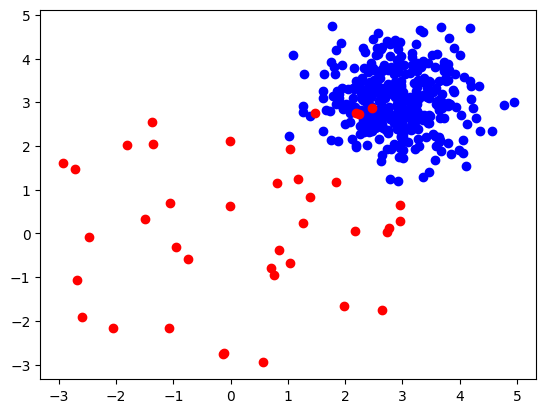

In [5]:
def ex1(contamination=0.1):
    data = generate_data(n_train=400, n_test=100, n_features=2, contamination=contamination, random_state=23)
    train_data, test_data, train_labels, test_labels = data

    train_inliers = train_data[train_labels == 0]
    train_outliers = train_data[train_labels == 1]

    plt.scatter(train_inliers[:, 0], train_inliers[:, 1], c='blue', label='Train Inliers')
    plt.scatter(train_outliers[:, 0], train_outliers[:, 1], c='red', label='Train Outliers')

    plt.show()

    return train_data, test_data, train_labels, test_labels


train_data, test_data, train_labels, test_labels = ex1()

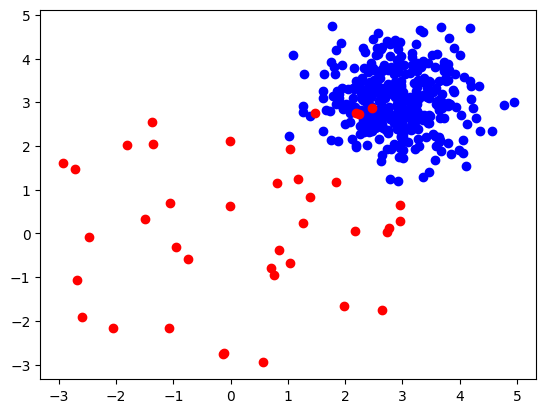

TN:  89
TP:  10
FN:  0
FP:  1
Balanced Accuracy: 0.99


c:\Master\Homework-Anomaly-Detection-AD\Laboratories\Laboratory-1\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


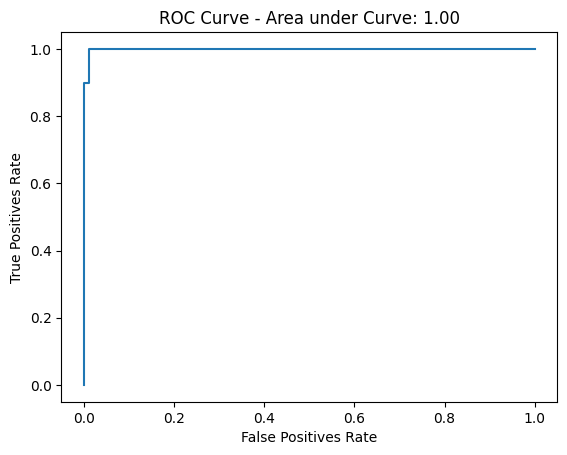

In [6]:
def ex2():
    train_data, test_data, train_labels, test_labels = ex1()

    knn = KNN(contamination=0.1)

    knn.fit(train_data, train_labels)

    train_predictions = knn.predict(train_data)
    test_predictions = knn.predict(test_data)

    train_confusion_matrix = confusion_matrix(train_labels, train_predictions)
    test_confusion_matrix = confusion_matrix(test_labels, test_predictions)

    true_negatives = test_confusion_matrix[0, 0]
    true_positives = test_confusion_matrix[1, 1]
    false_negatives = test_confusion_matrix[1, 0]
    false_positives = test_confusion_matrix[0, 1]

    print('TN: ', true_negatives)
    print('TP: ', true_positives)
    print('FN: ', false_negatives)
    print('FP: ', false_positives)

    true_positives_rate = true_positives / (true_positives + false_negatives)
    true_negatives_rate = true_negatives / (true_negatives + false_positives)

    balanced_accuracy = (true_positives_rate + true_negatives_rate) / 2

    print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

    test_scores = knn.decision_function(test_data)
    false_positives_rate, true_positives_rate, thresholds = roc_curve(test_labels, test_scores)
    area_under_curve = auc(false_positives_rate, true_positives_rate)

    plt.plot(false_positives_rate, true_positives_rate)
    plt.xlabel('False Positives Rate')
    plt.ylabel('True Positives Rate')
    plt.title(f'ROC Curve - Area under Curve: {area_under_curve:.2f}')
    plt.show()


ex2()

In [7]:
def ex3():
    data = generate_data(n_train=1000, n_test=0, n_features=1, contamination=0.1, random_state=23)
    train_data, test_data, train_labels, test_labels = data

    z_scores = np.abs((train_data - np.mean(train_data))) / np.std(train_data)

    threshold = np.quantile(z_scores, 0.9)

    predictions = (z_scores > threshold).astype(int)
    inliers = train_data[predictions == 0]
    outliers = train_data[predictions == 1]

    balanced_accuracy = balanced_accuracy_score(train_labels, predictions)
    print(f'Balanced Accuracy: {balanced_accuracy:.2f}')


ex3()

Balanced Accuracy: 0.82


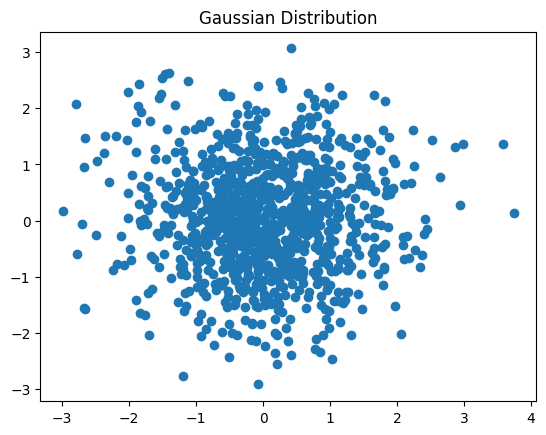

In [8]:
def ex4():
    num_dims = 2
    mean = np.zeros(num_dims)
    covariance = np.eye(num_dims)

    data = np.random.multivariate_normal(np.zeros(num_dims), np.eye(num_dims), 1000)
    data = mean + data @ np.linalg.cholesky(covariance).T

    plt.scatter(data[:, 0], data[:, 1])
    plt.title('Gaussian Distribution')
    plt.show()


ex4()